In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import bmxobs

In [2]:
d = bmxobs.BMXObs("pas/210124_1400", channels="110,220,120")

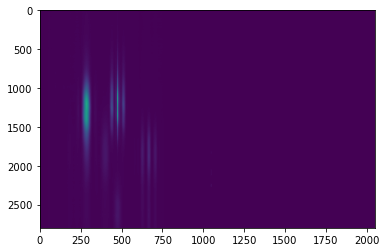

In [3]:
## find a transit by hand
imin = 38000
imax = 40800
plt.imshow(d[110][imin:imax,:],aspect='auto')

In [4]:
a11 = d[110][imin:imax,:]
a12 = d[120][imin:imax,:]
a22 = d[220][imin:imax,:]
freq = d.freq[0]

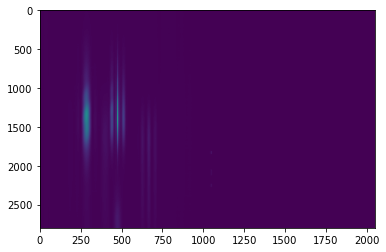

In [5]:
plt.imshow(a22,aspect='auto')

[]

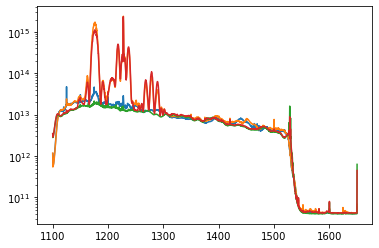

In [6]:
## OK, real nice booming signal
plt.plot(freq,a11[0,:])
plt.plot(freq,a11[1400,:])
plt.semilogy()

plt.plot(freq,a22[0,:])
plt.plot(freq,a22[1400,:])
plt.semilogy()


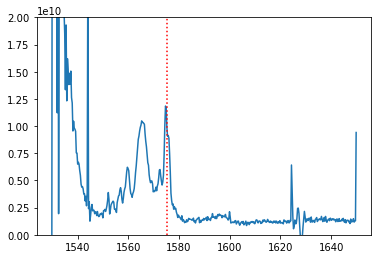

In [7]:
## first let's see if we can see the 1575 signal
ist=1600
plt.plot(freq[ist:],a11[1400,ist:]-a11[0,ist:])
plt.ylim(0,2e10)
plt.plot([1575.4,1575.4],[0,2e10],'r:')


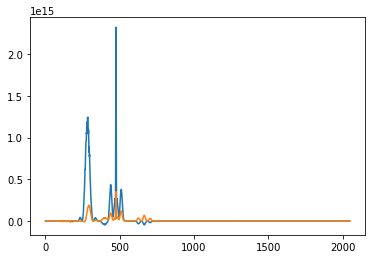

In [8]:
def fringefact (L,phi):
    return np.exp(1j*(phi+2*np.pi*freq*1e6*L/3e8))
## this seems like a very approximate starting point
frot = a12[1400,:]*fringefact(+0.01,-1.5/2)
plt.plot(np.real(frot))
plt.plot(np.imag(frot))
#plt.semilogy()

In [9]:
def cost(x):
    cost =  (np.imag(a12*fringefact(*x))[1000:1300]**2).sum()
    return cost
Lm,phim=fmin(cost,[+0.00,0])

Optimization terminated successfully.
         Current function value: 5503626412805610228442103159980032.000000
         Iterations: 98
         Function evaluations: 184


In [10]:
cost([0.01,-1.5/2]), cost([0,0]), cost ([Lm,phim])

(5.715259254668767e+33, 6.420404048498969e+33, 5.50362641280561e+33)

(1000, 1500)

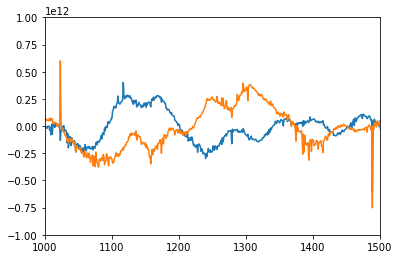

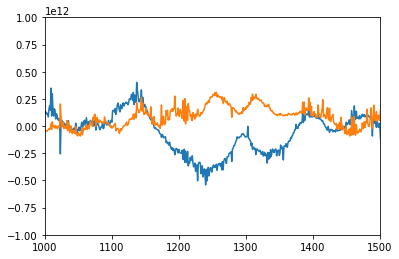

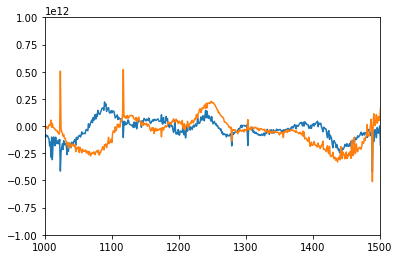

In [141]:
def fringefact (L,phi):
    return np.exp(1j*(phi+2*np.pi*freq*1e6*L/3e8))
## this seems like a very approximate starting point
plt.figure()
frot = a12[1400,:]*fringefact(+0,0)
plt.plot(np.real(frot))
plt.plot(np.imag(frot))
plt.ylim(-1e12,1e12)
plt.xlim(1000,1500)

plt.figure()
frot = a12[0,:]*fringefact(+0,0)
plt.plot(np.real(frot))
plt.plot(np.imag(frot))
plt.ylim(-1e12,1e12)
plt.xlim(1000,1500)

plt.figure()
frot = a12[-1,:]*fringefact(+0,0)
plt.plot(np.real(frot))
plt.plot(np.imag(frot))
plt.ylim(-1e12,1e12)
plt.xlim(1000,1500)




In [147]:
a12norm = a12 / np.sqrt(a11*a22).max(axis=0)[None,:]

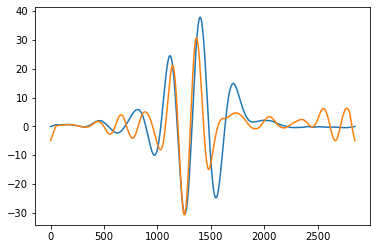

In [190]:
plt.plot(np.convolve(a12norm[:,250:270].mean(axis=1),np.ones(50)))
plt.plot(np.convolve(a12norm[:,1760:1780].mean(axis=1),np.ones(50)*10)-5) ## 1575 signal
#plt.plot(np.convolve(a12norm[:,1360:1380].mean(axis=1),np.ones(50)*20)) 
#plt.plot(np.convolve(a12norm[:,1160:1180].mean(axis=1),np.ones(50)*20)) 
#plt.plot(np.convolve(a12norm[:,2250:2270].mean(axis=1),np.ones(50)))


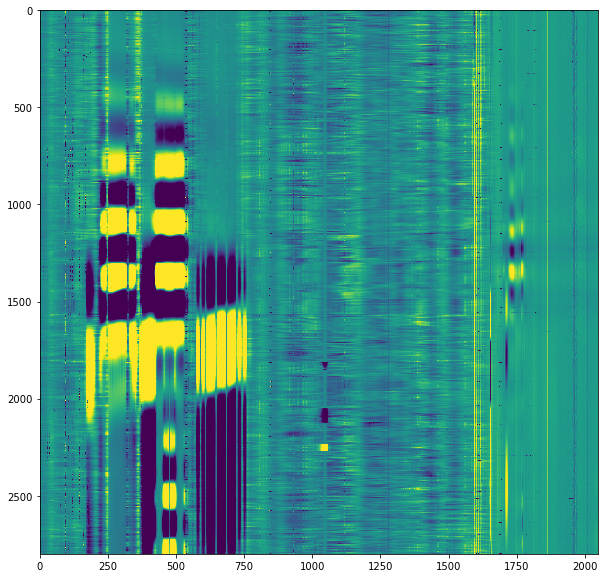

In [183]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(a12norm),aspect='auto',vmin=-0.1, vmax=0.1)

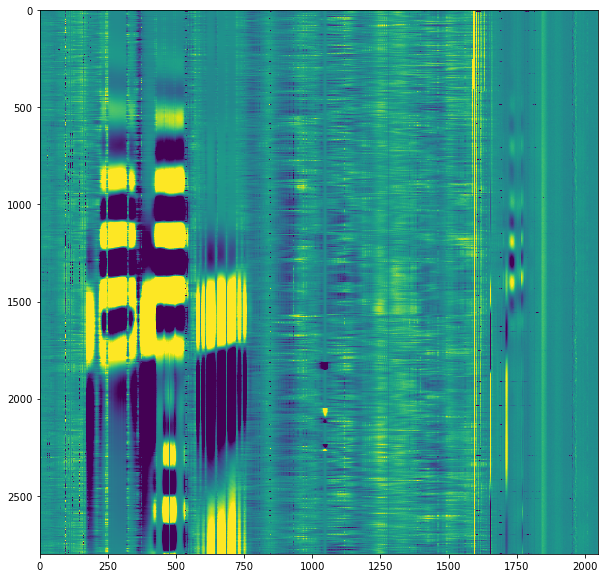

In [184]:
plt.figure(figsize=(10,10))
plt.imshow(np.imag(a12norm),aspect='auto',vmin=-0.1, vmax=0.1)

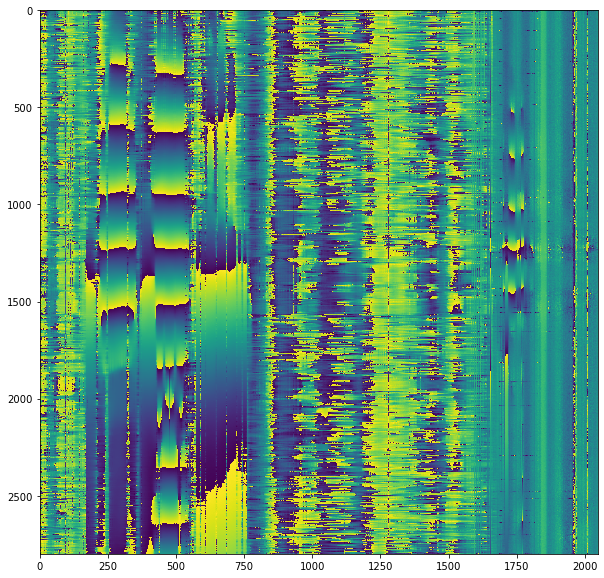

In [187]:
plt.figure(figsize=(10,10))
plt.imshow(np.arctan2(np.imag(a12norm),np.real(a12norm)),aspect='auto')